# Demo: Sampling with LoRA in Diffusion Models

Sample with vanilla Stable Diffusion.

100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


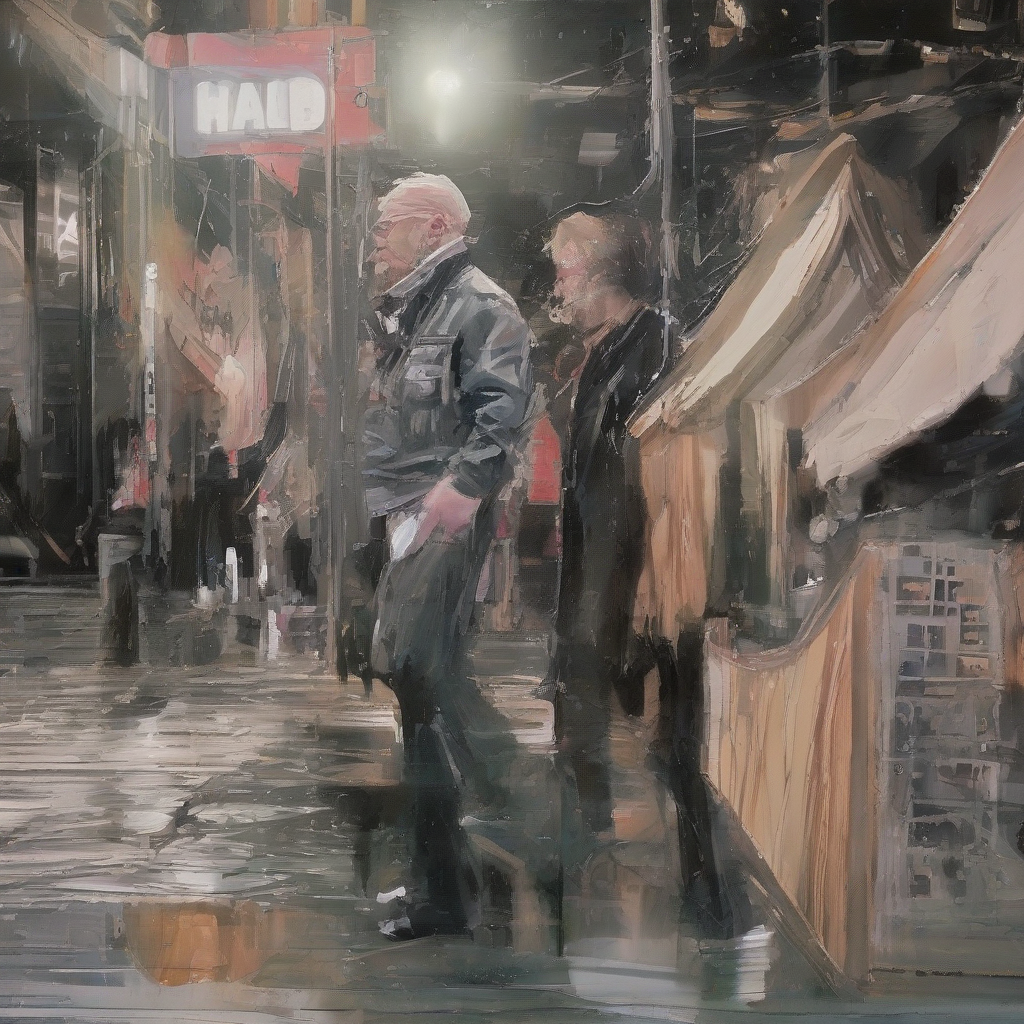

In [4]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler
import torch
import time


model_id = "../stable-diffusion/sdxl-base-1.0"

pipe = DiffusionPipeline.from_pretrained(model_id, variant="fp16")
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to(device="cuda", dtype=torch.float16)

# necessary for outputing attack performance
def dummy(images, **kwargs):
    return images, [False] * images.shape[0]
pipe.safety_checker = dummy 

prompt = "close-up photography of old man standing in the rain at night, in a street lit by lamps, leica 35mm summilux"
torch.manual_seed(time.time())
images = pipe(
    prompt=prompt,
    num_inference_steps=25,
    guidance_scale=1,
).images[0]

images  # nice. diffusers are cool.

Sample with LoRA in Stable Diffusion

100%|██████████| 25/25 [00:02<00:00, 11.20it/s]


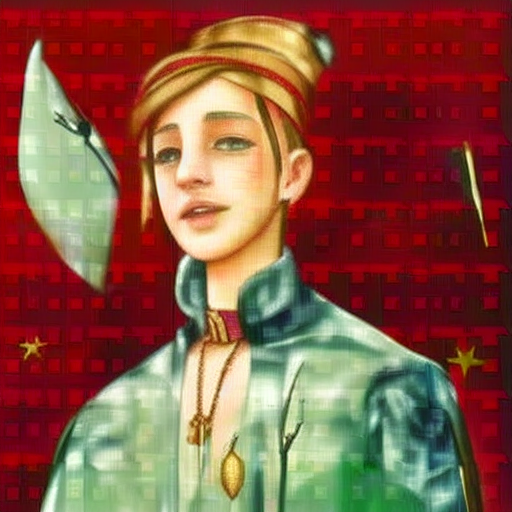

In [31]:
# lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
# lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
# pipe.unet.load_attn_procs(lora_model_path)
pipe.load_lora_weights(lora_model_path)



pipe.to("cuda")
# use half the weights from the LoRA finetuned model and half the weights from the base model
torch.manual_seed(time.time())
image = pipe(
    "a painting of a sks person, high quality, masterpiece", num_inference_steps=25, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}
).images[0]
# use the weights from the fully finetuned LoRA model

image.save("lora_sample.png")

image